In [1]:
import numpy as np 
import torch 
from torch.utils.data import Dataset, DataLoader

In [3]:
pos_list = [[20,20], [20,60], [20,100], 
            [60,20], [60,60], [60,100], 
            [100,20], [100,60], [100,100]]
d_PGM = torch.load('PGM_shape_size_color_normalized.pt') # torch.Size([7, 10, 10, 40, 40])

def load_PGM_inputs(attr): 
    """attr: (3, 9, 3), (num_panel, num_pos, num_attr)"""
    inputs = -0.6891*torch.ones((3, 160, 160))
    for i_panel in range(3): 
        for i_pos in range(9): 
            if attr[i_panel, i_pos, 0] != -1: 
                i_shape, i_size, i_color = attr[i_panel, i_pos]
                x0, y0 = pos_list[i_pos]
                inputs[i_panel, x0:(x0+40), y0:(y0+40)] = d_PGM[int(i_shape), int(i_size), int(i_color)]
    return inputs 

class dataset_PGM_single(Dataset): 
    def __init__(self, attr_list): 
        """attr_list: [num_samples, 3, 9, 3]"""
        self.attr_list = attr_list  
        
    def __len__(self): 
        return len(self.attr_list)
    
    def __getitem__(self, idx): 
        """attr: [3, 9, 3]"""
        attr = self.attr_list[idx] 
        inputs = load_PGM_inputs(attr)
        return inputs

In [4]:
train_inputs = torch.load('train_inputs.pt') # [35, 10000, 3, 9, 3]

In [59]:
# example: 
i_class = 4
dataset_class0 = dataset_PGM_single(train_inputs[i_class]) 
load_class0 = DataLoader(dataset_class0, batch_size=256, shuffle=False, pin_memory=True) 

In [ ]:
train_inputs[i_class][:, :, :, 0]

In [65]:
train_inputs[0].shape

torch.Size([10000, 3, 9, 3])

In [45]:
inputs = next(iter(load_class0))

In [46]:
inputs.shape

torch.Size([256, 3, 160, 160])

In [50]:
torch.cat([mtg1, mtg2, mtg3], dim=1).shape

torch.Size([3, 486, 484])

In [ ]:
from torchvision.transforms import Resize
import PIL
resize_transform = Resize(size=(192, 192), interpolation=PIL.Image.BICUBIC)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


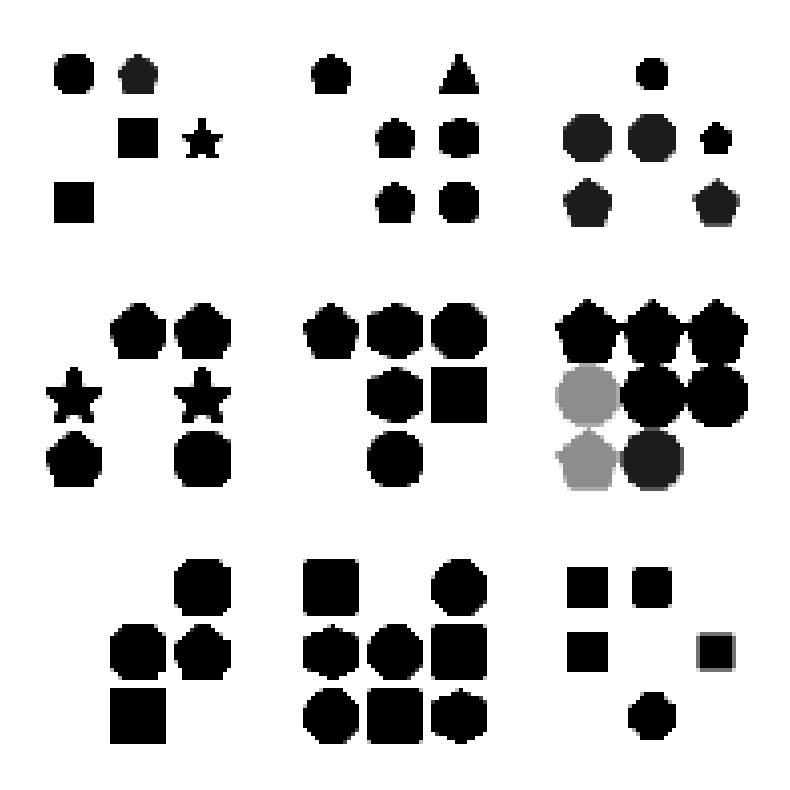

In [60]:
import torchvision
from torchvision.utils import save_image, make_grid
import torch.nn.functional as F
import matplotlib.pyplot as plt
mtg1 = make_grid(inputs[2,][:,None] / -0.6891, nrow=3, padding=0, pad_value=1)
mtg2 = make_grid(inputs[4,][:,None] / -0.6891, nrow=3, padding=0, pad_value=1)
mtg3 = make_grid(inputs[10,][:,None] / -0.6891, nrow=3, padding=0, pad_value=1)
plt.figure(figsize=(10,10))
plt.imshow(torchvision.transforms.Resize((192, 192))(
           torch.cat([mtg1, mtg2, mtg3], dim=1),).permute(1,2,0))
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


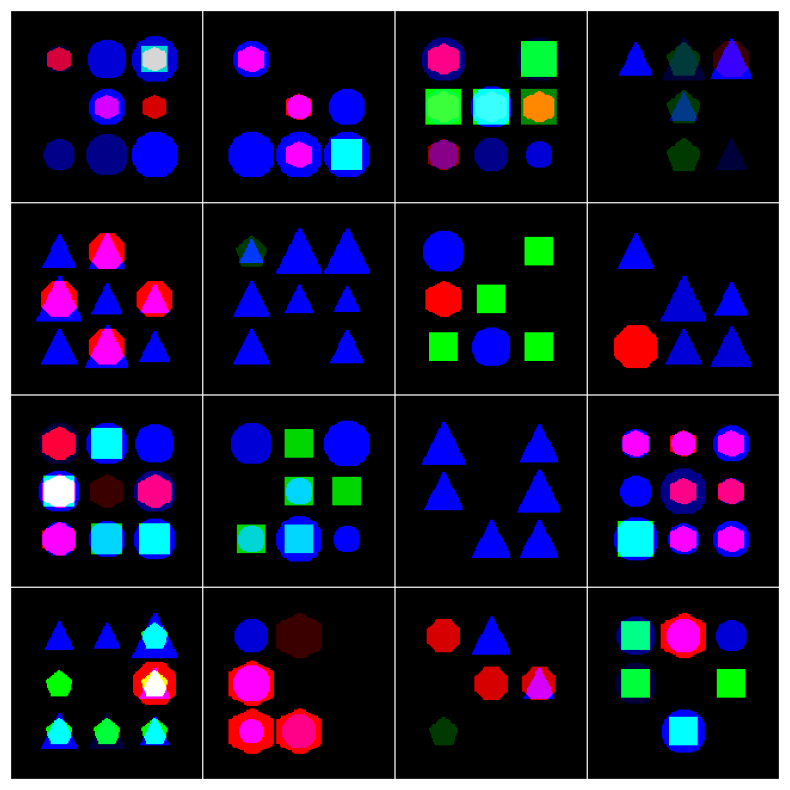

In [11]:
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt
mtg = make_grid(inputs[:16], nrow=4, padding=1, pad_value=1)
plt.figure(figsize=(10,10))
plt.imshow(mtg.permute(1,2,0))
plt.axis('off')
plt.show()